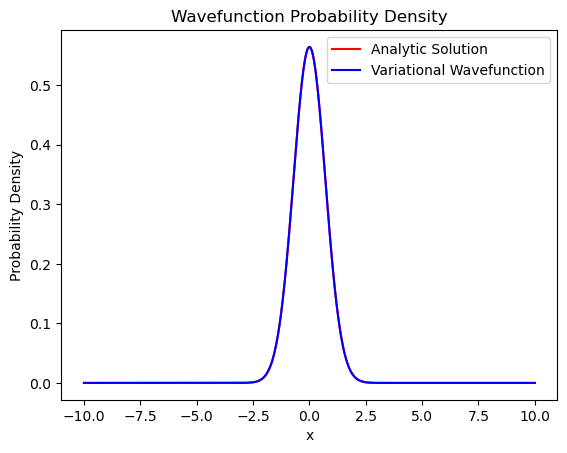

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from wavefunction import Wavefunction, variational_optimization

wf = Wavefunction(L=0.5, b=0., c = [0.,0.], w = [0.,0.])
x = np.linspace(-10, 10, 10000)
wf.compute(x)
wf.plot()

In [2]:
Nh = 2
result = variational_optimization({"Nh":Nh})

In [3]:
result

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 0.49998747980599245
       x: [ 1.159e-02  7.308e-02  2.585e-02 -4.140e-03 -1.867e-02]
     nit: 1000
    nfev: 10097
    njev: 16
    nhev: 0

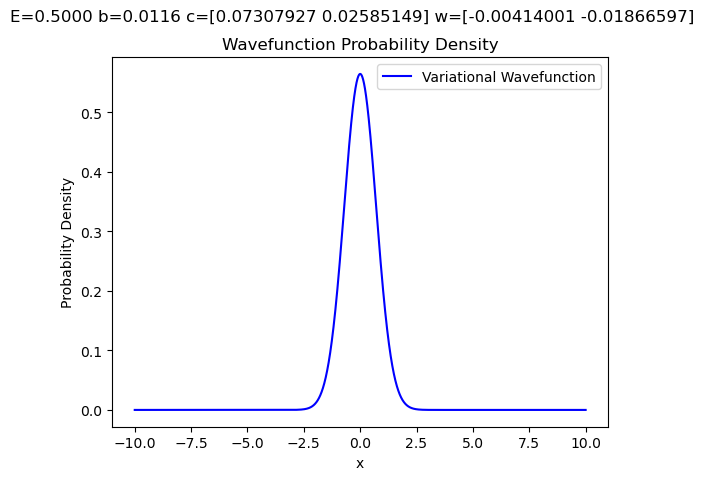

In [4]:
b = result.x[0]
c = result.x[1:Nh+1]
w = result.x[Nh+1:2*Nh+1]
wf = Wavefunction(L=0.5, b=b, c=c, w=w)
x = np.linspace(-10, 10, 10000)
wf.compute(x)
plt.figure()
plt.suptitle(f"E={wf.total_energy():.4f} b={b:.4f} c={c} w={w}")
wf.plot(analytic=False)


In [5]:
print("b=", b)
print("c=", c)
print("w=", w)


b= 0.011589275644690112
c= [0.07307927 0.02585149]
w= [-0.00414001 -0.01866597]


In [6]:
wf2=Wavefunction(L=0.5, b=b, c=c, w=w)
x = np.linspace(-10, 10, 10000)

prod = 1.
for i in range(Nh):
    prod *= 1+np.exp(c[i]+x*w[i])
print(prod)

from scipy.integrate import trapezoid
integral = trapezoid(prod, x)
print("integral=", integral)
print("normalization=", 1./integral**2)


[4.74485787 4.74473915 4.74462043 ... 3.76266302 3.76258259 3.76250216]
integral= 84.43731776097684
normalization= 0.00014025913038532415


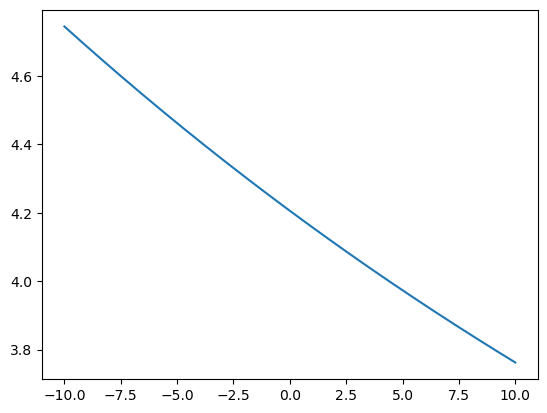

In [7]:
plt.plot(x, prod)